In [92]:
import pandas as pd

In [93]:
df = pd.read_csv('Mall_Customers.csv', index_col = 'CustomerID')

In [94]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [95]:
df.shape

(200, 4)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [97]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [98]:
df = df.rename(columns={'Genre':'Gender'})

In [99]:
df.shape

(200, 4)

In [100]:
df = df.rename(columns={'Annual Income (k$)':'Annual Income'})

In [101]:
df = df.rename(columns={'Spending Score (1-100)':'Spending Score'})

In [102]:
df.shape

(200, 4)

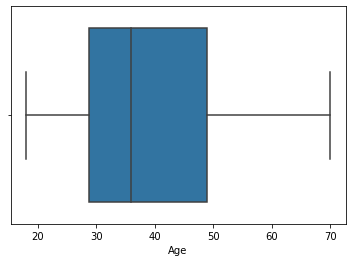

In [103]:
import seaborn as sns
sns.boxplot(x=df['Age'])

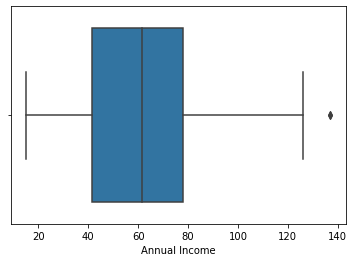

In [104]:
sns.boxplot(x=df['Annual Income'])

In [105]:
df.shape

(200, 4)

In [106]:
df = df[df['Annual Income'] < 137]

In [107]:
df.shape

(198, 4)

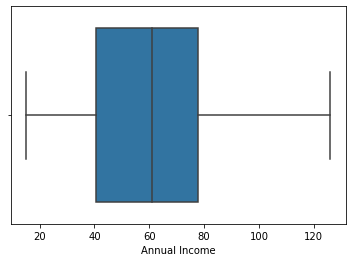

In [108]:
sns.boxplot(x=df['Annual Income'])

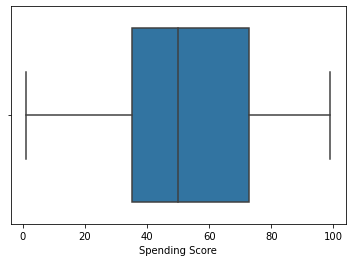

In [109]:
sns.boxplot(x=df['Spending Score'])

In [110]:
df = pd.get_dummies(df, drop_first=True)

In [111]:
df.shape

(198, 4)

In [112]:
df.head(20)

,Age,Annual Income,Spending Score,Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
6,22,17,76,0
7,35,18,6,0
8,23,18,94,0
9,64,19,3,1


In [113]:
X = df['Gender_Male']
X

CustomerID
1      1
2      1
3      0
4      0
5      0
      ..
194    0
195    0
196    0
197    0
198    1
Name: Gender_Male, Length: 198, dtype: uint8

In [114]:
df = df.drop(columns=['Gender_Male'])
df.head(10)

,Age,Annual Income,Spending Score
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
6,22,17,76
7,35,18,6
8,23,18,94
9,64,19,3


In [115]:
Y = list(df.index)
Y

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
sc = StandardScaler()
df = sc.fit_transform(df)

In [118]:
df

array([[-1.42541358, -1.77917141, -0.43598941],
       [-1.2823665 , -1.77917141,  1.19941337],
       [-1.35389004, -1.73944701, -1.72094874],
       [-1.13931942, -1.73944701,  1.04366072],
       [-0.5671311 , -1.69972262, -0.39705125],
       [-1.21084296, -1.69972262,  1.00472256],
       [-0.28103694, -1.65999822, -1.72094874],
       [-1.13931942, -1.65999822,  1.70560947],
       [ 1.79314572, -1.62027383, -1.83776323],
       [-0.63865464, -1.62027383,  0.84896992],
       [ 2.00771635, -1.62027383, -1.40944345],
       [-0.28103694, -1.62027383,  1.90030028],
       [ 1.36400448, -1.58054943, -1.37050529],
       [-1.06779588, -1.58054943,  1.04366072],
       [-0.13798986, -1.58054943, -1.44838161],
       [-1.21084296, -1.58054943,  1.12153705],
       [-0.28103694, -1.54082504, -0.59174206],
       [-1.35389004, -1.54082504,  0.61534095],
       [ 0.93486324, -1.46137625, -0.82537103],
       [-0.28103694, -1.46137625,  1.86136212],
       [-0.28103694, -1.42165185, -0.591

In [120]:
scaled_df = pd.DataFrame({'Age':df[:,0], 'Annual Income':df[:,1], 'Spending Score':df[:,2]})

In [121]:
scaled_df.head(20)

,Age,Annual Income,Spending Score
0,-1.425414,-1.779171,-0.435989
1,-1.282367,-1.779171,1.199413
2,-1.353890,-1.739447,-1.720949
3,-1.139319,-1.739447,1.043661
4,-0.567131,-1.699723,-0.397051
5,-1.210843,-1.699723,1.004723
6,-0.281037,-1.659998,-1.720949
7,-1.139319,-1.659998,1.705609
8,1.793146,-1.620274,-1.837763
9,-0.638655,-1.620274,0.848970


In [122]:
scaled_df['CustomerID'] = Y

In [123]:
scaled_df.shape

(198, 4)

In [124]:
scaled_df.head(10)

,Age,Annual Income,Spending Score,CustomerID
0,-1.425414,-1.779171,-0.435989,1
1,-1.282367,-1.779171,1.199413,2
2,-1.353890,-1.739447,-1.720949,3
3,-1.139319,-1.739447,1.043661,4
4,-0.567131,-1.699723,-0.397051,5
5,-1.210843,-1.699723,1.004723,6
6,-0.281037,-1.659998,-1.720949,7
7,-1.139319,-1.659998,1.705609,8
8,1.793146,-1.620274,-1.837763,9
9,-0.638655,-1.620274,0.848970,10


In [125]:
scaled_df = scaled_df.set_index('CustomerID')
scaled_df

,Age,Annual Income,Spending Score
CustomerID,,,
1,-1.425414,-1.779171,-0.435989
2,-1.282367,-1.779171,1.199413
3,-1.353890,-1.739447,-1.720949
4,-1.139319,-1.739447,1.043661
5,-0.567131,-1.699723,-0.397051
...,...,...,...
194,-0.066466,2.113819,1.588795
195,0.577246,2.391890,-1.331567
196,-0.281037,2.391890,1.121537


In [126]:
X

CustomerID
1      1
2      1
3      0
4      0
5      0
      ..
194    0
195    0
196    0
197    0
198    1
Name: Gender_Male, Length: 198, dtype: uint8

In [127]:
X.dtypes

dtype('uint8')

In [128]:
scaled_df['Gender_Male'] = X

In [129]:
scaled_df.head(10)

,Age,Annual Income,Spending Score,Gender_Male
CustomerID,,,,
1,-1.425414,-1.779171,-0.435989,1
2,-1.282367,-1.779171,1.199413,1
3,-1.353890,-1.739447,-1.720949,0
4,-1.139319,-1.739447,1.043661,0
5,-0.567131,-1.699723,-0.397051,0
6,-1.210843,-1.699723,1.004723,0
7,-0.281037,-1.659998,-1.720949,0
8,-1.139319,-1.659998,1.705609,0
9,1.793146,-1.620274,-1.837763,1


In [130]:
scaled_df.describe()

,Age,Annual Income,Spending Score,Gender_Male
count,1.980000e+02,1.980000e+02,1.980000e+02,198.000000
mean,1.056955e-16,1.480297e-16,5.326828e-17,0.434343
std,1.002535e+00,1.002535e+00,1.002535e+00,0.496927
min,-1.496937e+00,-1.779171e+00,-1.915640e+00,0.000000
25%,-7.638208e-01,-7.661993e-01,-5.917421e-01,0.000000
50%,-2.095134e-01,4.815078e-02,-7.669638e-03,0.000000
75%,7.202926e-01,7.135344e-01,8.781735e-01,1.000000
max,2.222287e+00,2.630236e+00,1.900300e+00,1.000000


In [131]:
scaled_df = scaled_df.drop_duplicates(keep='first')

In [132]:
scaled_df.shape

(198, 4)

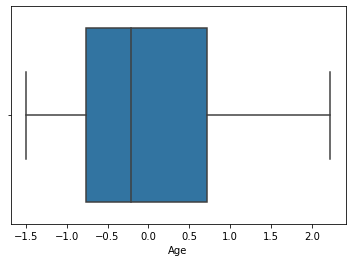

In [134]:
import seaborn as sns
sns.boxplot(x=scaled_df['Age'])

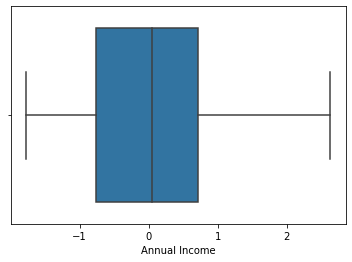

In [135]:
import seaborn as sns
sns.boxplot(x=scaled_df['Annual Income'])

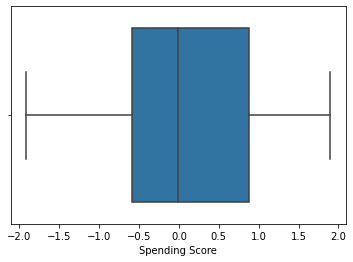

In [136]:
import seaborn as sns
sns.boxplot(x=scaled_df['Spending Score'])

In [137]:
from scipy.spatial.distance import cdist

In [138]:
clusters = range(1,11)
mean_dist = []

In [139]:
from sklearn.cluster import KMeans
import numpy as np

In [140]:
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(scaled_df)
    mean_dist.append(sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis=1))/scaled_df.shape[0])

In [141]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Elbow curve')

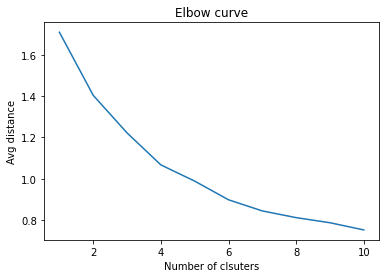

In [142]:
plt.plot(clusters, mean_dist)
plt.xlabel('Number of clsuters')
plt.ylabel('Avg distance')
plt.title('Elbow curve')

In [143]:
model1 = KMeans(n_clusters = 4)
model1.fit(scaled_df)

KMeans(n_clusters=4)

In [144]:
from sklearn.decomposition import PCA

In [145]:
pca_2 = PCA(2)

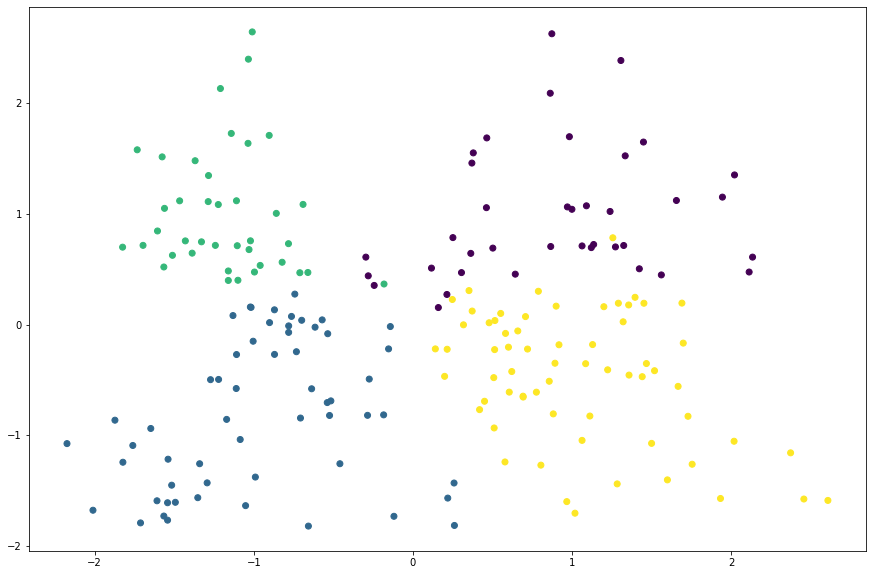

In [147]:
plt.figure(figsize=(15,10))
plot_columns = pca_2.fit_transform(scaled_df)
plt.scatter(x = plot_columns[:,0], y = plot_columns[:,1], c = model1.labels_)
plt.show()

In [41]:
prediction = model1.predict(scaled_df)

In [42]:
prediction

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [43]:
prediction.shape

(198,)

In [44]:
scaled_df['Cluster'] = prediction

In [45]:
scaled_df

,Gender,Age,Annual Income,Spending Score,Cluster
0,-1.425414,-1.779171,-0.435989,1.141195,1
1,-1.282367,-1.779171,1.199413,1.141195,1
2,-1.353890,-1.739447,-1.720949,-0.876275,0
3,-1.139319,-1.739447,1.043661,-0.876275,1
4,-0.567131,-1.699723,-0.397051,-0.876275,1
...,...,...,...,...,...
193,-0.066466,2.113819,1.588795,-0.876275,1
194,0.577246,2.391890,-1.331567,-0.876275,0
195,-0.281037,2.391890,1.121537,-0.876275,1
196,0.434198,2.630236,-0.864309,-0.876275,0
